In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data.csv')
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
df.shape

(12684, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [5]:
# renaming target variable as Y

df['Y'] = df['Accept(Y/N?)']
df.drop(['Accept(Y/N?)'],axis = 1,inplace = True)

In [6]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


### unique values

In [7]:
print('destination -',df['destination'].unique())
print('passanger -', df['passanger'].unique())
print('weather -', df['weather'].unique())
print('temperature -', df['temperature'].unique())
print('coupon -', df['coupon'].unique())
print('gender -', df['gender'].unique())
print('age -', df['age'].unique())
print('maritalStatus -', df['maritalStatus'].unique())
print('has_children -', df['has_children'].unique())
print('education -', df['education'].unique())
print('occupation -', df['occupation'].unique())
print('income -', df['income'].unique())
print('Bar -', df['Bar'].unique())
print('CoffeeHouse -', df['CoffeeHouse'].unique())
print('CarryAway -', df['CarryAway'].unique())
print('RestaurantLessThan20 -', df['RestaurantLessThan20'].unique())
print('Restaurant20To50 -', df['Restaurant20To50'].unique())
print('toCoupon_GEQ15min -', df['toCoupon_GEQ15min'].unique())
print('toCoupon_GEQ25min -', df['toCoupon_GEQ25min'].unique())
print('direction_same -', df['direction_same'].unique())

destination - ['No Urgent Place' 'Home' 'Work']
passanger - ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather - ['Sunny' 'Rainy' 'Snowy']
temperature - [55 80 30]
coupon - ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
gender - ['Female' 'Male']
age - ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus - ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
has_children - [1 0]
education - ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation - ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Cons

In [8]:
df['occupation'].value_counts()

Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science                  170


# Data preprocessing and Cleaning

### Remove duplicates

In [10]:
df = df.drop_duplicates()
print("Shape of dataset after removing duplicates:",df.shape)

Shape of dataset after removing duplicates: (12393, 25)


## check for missing values

In [11]:
df.isnull().mean()*100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.144678
Bar                      0.855322
CoffeeHouse              1.734850
CarryAway                1.194223
RestaurantLessThan20     1.032841
Restaurant20To50         1.516985
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

# since car feature has 99% of missing values, so will remove this feature and use mode to impute missing values

In [12]:
df['Bar']=df['Bar'].fillna(df['Bar'].value_counts().index[0])
df['CoffeeHouse']=df['CoffeeHouse'].fillna(df['CoffeeHouse'].value_counts().index[0])
df['CarryAway']=df['CarryAway'].fillna(df['CarryAway'].value_counts().index[0])
df['RestaurantLessThan20']=df['RestaurantLessThan20'].fillna(df['RestaurantLessThan20'].value_counts().index[0])
df['Restaurant20To50']=df['Restaurant20To50'].fillna(df['Restaurant20To50'].value_counts().index[0])

In [13]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12287
Bar                         0
CoffeeHouse                 0
CarryAway                   0
RestaurantLessThan20        0
Restaurant20To50            0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [14]:
df.drop('car',axis = 1, inplace = True)

In [15]:
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,1,0,0,1,0


### we will be cleaning all values inside each column

In [16]:
def clean_categorical_columns(df):
    # Iterate over each column in the DataFrame
    for column_name in df.columns:
        # Check if the column is of object type (categorical)
        if df[column_name].dtype == 'object':
            # Apply the cleaning operations
            df[column_name] = df[column_name].str.replace('~', '-', regex=False)
            df[column_name] = df[column_name].str.replace('[^a-zA-Z0-9_ ]', ' ', regex=True)
            df[column_name] = df[column_name].str.replace(' +', ' ', regex=True).str.strip()
            df[column_name] = df[column_name].str.replace(' ', '-')
            df[column_name] = df[column_name].str.lower()
    return df

In [17]:
df = clean_categorical_columns(df)

In [18]:
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,no-urgent-place,alone,sunny,55,restaurant-20,1d,female,21,unmarried-partner,1,...,never,1-3,4-8,1-3,1,0,0,0,1,1
1,no-urgent-place,friend-s,sunny,80,coffee-house,2h,female,21,unmarried-partner,1,...,never,1-3,4-8,1-3,1,0,0,0,1,0
2,no-urgent-place,friend-s,sunny,80,carry-out-take-away,2h,female,21,unmarried-partner,1,...,never,1-3,4-8,1-3,1,1,0,0,1,1
3,no-urgent-place,friend-s,sunny,80,coffee-house,2h,female,21,unmarried-partner,1,...,never,1-3,4-8,1-3,1,1,0,0,1,0
4,no-urgent-place,friend-s,sunny,80,coffee-house,1d,female,21,unmarried-partner,1,...,never,1-3,4-8,1-3,1,1,0,0,1,0


In [19]:
df['CarryAway'].unique()

array(['1-3', '4-8', 'gt8', 'less1', 'never'], dtype=object)

# Correlation

In [20]:
df.corr()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.016963,NaN,-0.141124,-0.230067,0.088885,-0.088885,0.064074
has_children,-0.016963,1.000000,NaN,0.078686,-0.011651,-0.032276,0.032276,-0.044889
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.141124,0.078686,NaN,1.000000,0.321919,-0.297284,0.297284,-0.086050
toCoupon_GEQ25min,-0.230067,-0.011651,NaN,0.321919,1.000000,-0.190759,0.190759,-0.107855
direction_same,0.088885,-0.032276,NaN,-0.297284,-0.190759,1.000000,-1.000000,0.016356
direction_opp,-0.088885,0.032276,NaN,0.297284,0.190759,-1.000000,1.000000,-0.016356
Y,0.064074,-0.044889,NaN,-0.086050,-0.107855,0.016356,-0.016356,1.000000


In [21]:
df['toCoupon_GEQ5min'].value_counts()

1    12393
Name: toCoupon_GEQ5min, dtype: int64

#### From the correlation matrix, we can see that Feature ‘direction_same’ is perfectly correlated with ‘direction_opp’, both have the same correlation value with the target feature. so there is no need for two perfectly correlated features so we can remove one of them feature.


#### ‘toCoupon_GEQ5min’ feature does not correlate with the target feature because it has the same value ‘1’ for all data points, which means all the food venues are at least more than five minutes away from the user.  so, need to drop both ‘direction_opp’ and ‘toCoupon_GEQ5min’ features because it has less importance and will not much help in prediction.



In [22]:
df = df.drop(['direction_opp','toCoupon_GEQ5min'], axis = 1)

In [23]:
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,no-urgent-place,alone,sunny,55,restaurant-20,1d,female,21,unmarried-partner,1,...,37500-49999,never,never,1-3,4-8,1-3,0,0,0,1
1,no-urgent-place,friend-s,sunny,80,coffee-house,2h,female,21,unmarried-partner,1,...,37500-49999,never,never,1-3,4-8,1-3,0,0,0,0
2,no-urgent-place,friend-s,sunny,80,carry-out-take-away,2h,female,21,unmarried-partner,1,...,37500-49999,never,never,1-3,4-8,1-3,1,0,0,1
3,no-urgent-place,friend-s,sunny,80,coffee-house,2h,female,21,unmarried-partner,1,...,37500-49999,never,never,1-3,4-8,1-3,1,0,0,0
4,no-urgent-place,friend-s,sunny,80,coffee-house,1d,female,21,unmarried-partner,1,...,37500-49999,never,never,1-3,4-8,1-3,1,0,0,0


# Visualization analysis

In [24]:
Y_value_counts = df.groupby('Y').Y.count()
print('The number of users that are accepted the coupon is ',Y_value_counts[1],',',round(Y_value_counts[1]/df.shape[0]*100,3),'%')
print('The number of users that are rejected the coupon is ',Y_value_counts[0],',',round(Y_value_counts[0]/df.shape[0]*100,3),'%')

The number of users that are accepted the coupon is  7012 , 56.58 %
The number of users that are rejected the coupon is  5381 , 43.42 %


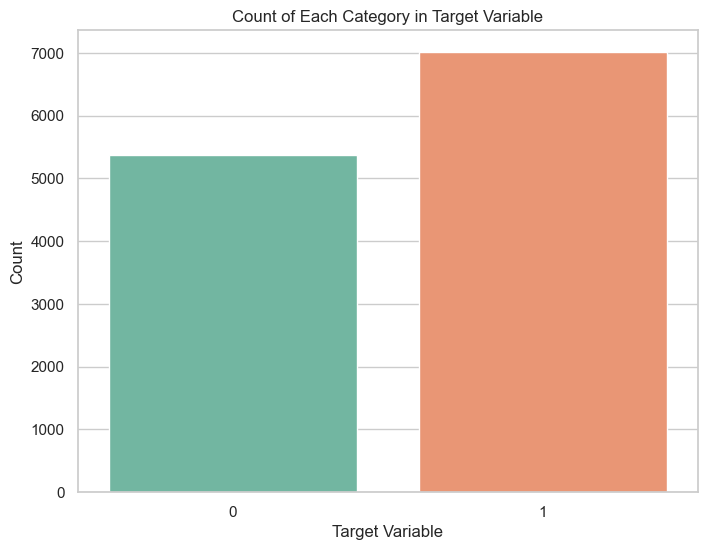

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Create the countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Y', data=df, palette='Set2')  
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.title('Count of Each Category in Target Variable')
plt.show()


#### here the target variable distribution seems fine

In [26]:
def univariate_analysis(column_name):
    df_EDA = pd.DataFrame(sorted(list(df[column_name].unique())),columns=[column_name])
    df_EDA['Total_Count'] = list(df.groupby(column_name).Y.count())
    df_EDA['Accepted'] = list(df[df.Y==1].groupby(column_name).Y.count())
    df_EDA['Rejected'] = list(df[df.Y==0].groupby(column_name).Y.count())
    df_EDA['%Accepted'] = round(df_EDA['Accepted']/df_EDA['Total_Count']*100,3)
    df_EDA['%Rejected'] = round(df_EDA['Rejected']/df_EDA['Total_Count']*100,3)
    df_EDA = df_EDA.sort_values(by='Total_Count', ascending=False)
    
    fig = plt.subplots(figsize =(8, 4))
    plt.barh(df_EDA[column_name],df_EDA['Total_Count'])
    plt.barh(df_EDA[column_name],df_EDA['Accepted'])
    plt.legend(labels=['Total','Accepted'])
    plt.xlabel('Counts')
    plt.title(column_name+' wise accepted coupons')
    plt.show()

    return df_EDA

##### Coupons

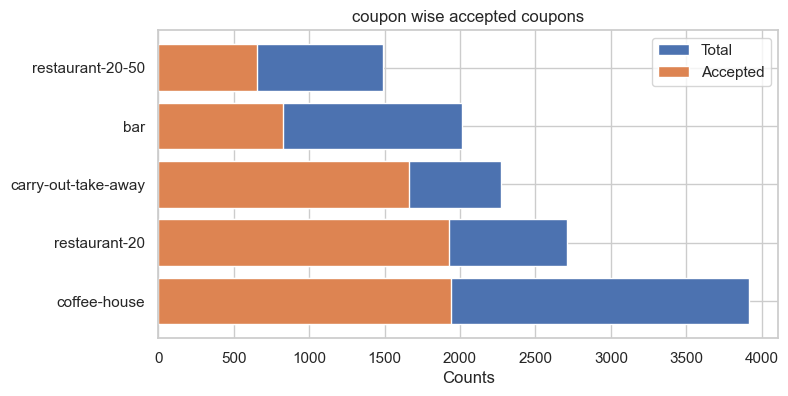

,coupon,Total_Count,Accepted,Rejected,%Accepted,%Rejected
2,coffee-house,3913,1943,1970,49.655,50.345
3,restaurant-20,2708,1924,784,71.049,28.951
1,carry-out-take-away,2275,1665,610,73.187,26.813
0,bar,2010,824,1186,40.995,59.005
4,restaurant-20-50,1487,656,831,44.116,55.884


In [27]:
univariate_analysis("coupon")

#### We can see that the maximum coupons offered are for Coffee House. Also, maximum coupons accepted by users are Carry out & Take away and Restaurant(<20) coupons. Bar coupon has a very low acceptance ratio.

#### Age

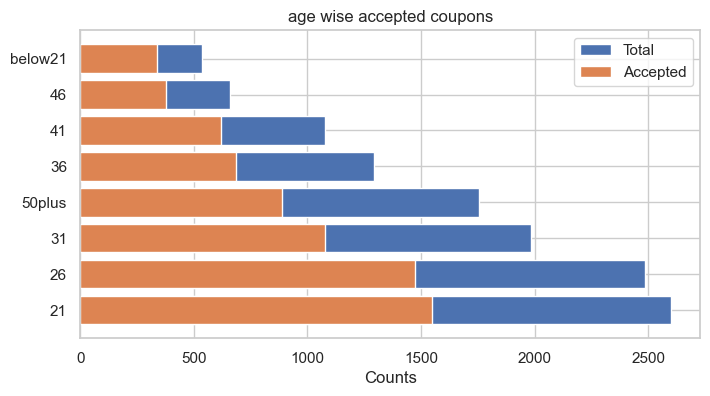

,age,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,21,2598,1549,1049,59.623,40.377
1,26,2486,1475,1011,59.332,40.668
2,31,1984,1079,905,54.385,45.615
6,50plus,1756,888,868,50.569,49.431
3,36,1293,687,606,53.132,46.868
4,41,1079,618,461,57.275,42.725
5,46,660,378,282,57.273,42.727
7,below21,537,338,199,62.942,37.058


In [28]:
univariate_analysis("age")

In [29]:
#### Education

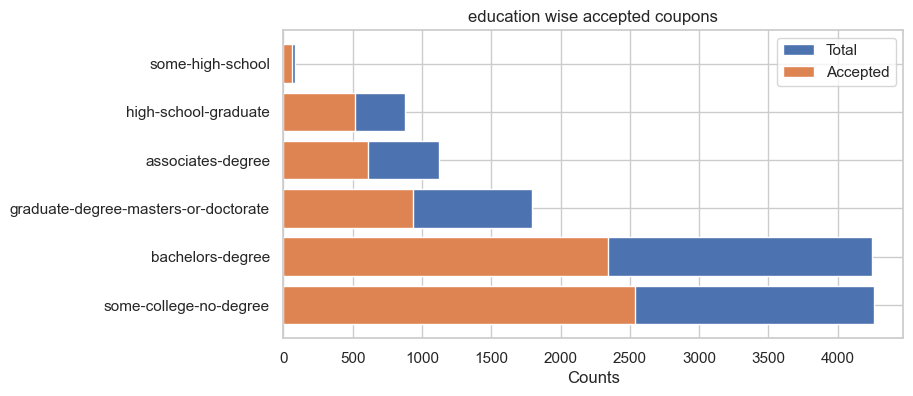

,education,Total_Count,Accepted,Rejected,%Accepted,%Rejected
4,some-college-no-degree,4260,2534,1726,59.484,40.516
1,bachelors-degree,4247,2344,1903,55.192,44.808
2,graduate-degree-masters-or-doctorate,1793,939,854,52.370,47.630
0,associates-degree,1126,614,512,54.529,45.471
3,high-school-graduate,880,519,361,58.977,41.023
5,some-high-school,87,62,25,71.264,28.736


In [30]:
univariate_analysis("education")

##### We can see that most users have at least a Bachelors degree or Some college no degree, very few users have only Some High School education, and those users have the highest coupon acceptance ratio because of very few data points of Some High School education. Also, users who have a Graduate degree (Masters or Doctorate) have the least coupon acceptance ratio.

#### Destination

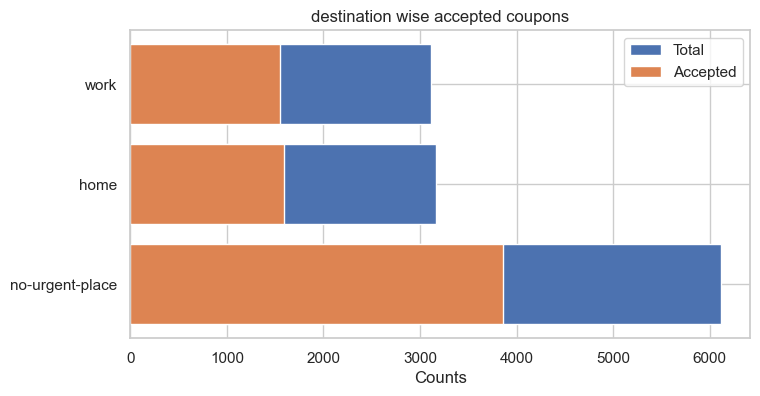

,destination,Total_Count,Accepted,Rejected,%Accepted,%Rejected
1,no-urgent-place,6118,3865,2253,63.174,36.826
0,home,3161,1594,1567,50.427,49.573
2,work,3114,1553,1561,49.872,50.128


In [31]:
univariate_analysis('destination')

#### we can see that about 50% of passengers are going to no urgent palce and having high acceptance ratio

### Income

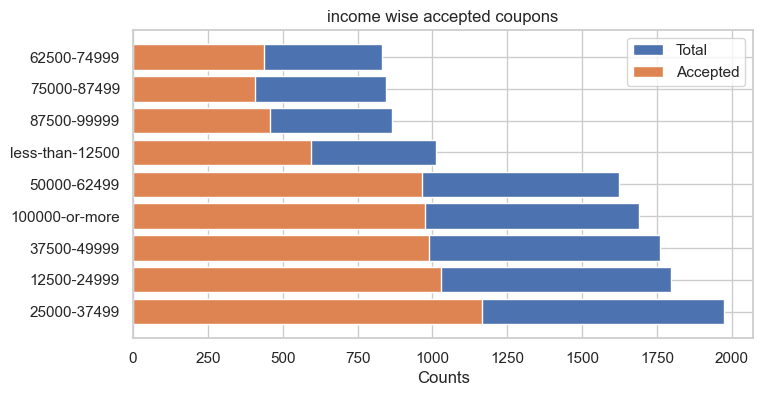

,income,Total_Count,Accepted,Rejected,%Accepted,%Rejected
2,25000-37499,1972,1165,807,59.077,40.923
1,12500-24999,1795,1029,766,57.326,42.674
3,37500-49999,1760,987,773,56.080,43.920
0,100000-or-more,1688,974,714,57.701,42.299
4,50000-62499,1624,964,660,59.360,40.640
8,less-than-12500,1013,593,420,58.539,41.461
7,87500-99999,865,456,409,52.717,47.283
6,75000-87499,844,407,437,48.223,51.777
5,62500-74999,832,437,395,52.524,47.476


In [33]:
univariate_analysis('income')

#### Observations:

- Most users in this data have income in between 12500 to 50000. 

- Users who have low income and high income accept more coupons than others. 
 

### Weather

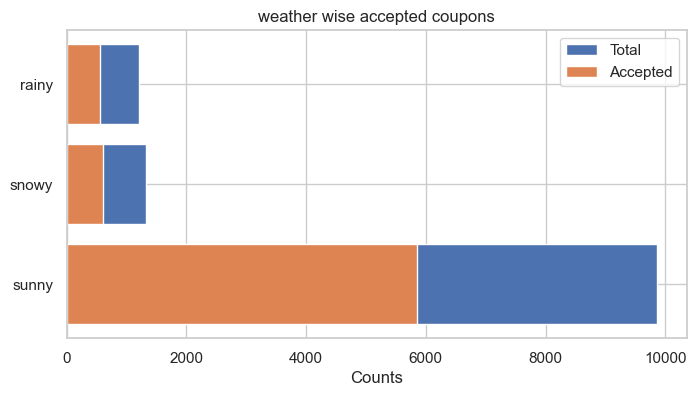

,weather,Total_Count,Accepted,Rejected,%Accepted,%Rejected
2,sunny,9862,5850,4012,59.319,40.681
1,snowy,1329,605,724,45.523,54.477
0,rainy,1202,557,645,46.339,53.661


In [34]:
univariate_analysis('weather')

##### in sunny weather there are more passengers accepting more couponsm

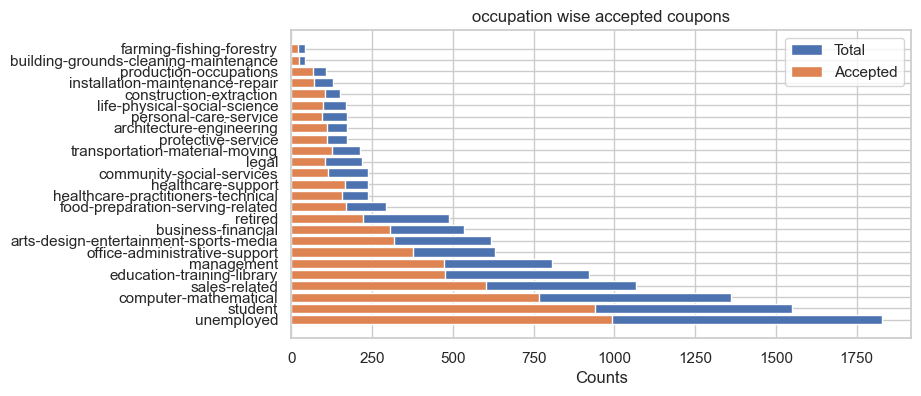

,occupation,Total_Count,Accepted,Rejected,%Accepted,%Rejected
24,unemployed,1828,993,835,54.322,45.678
22,student,1550,941,609,60.710,39.290
5,computer-mathematical,1360,768,592,56.471,43.529
21,sales-related,1066,602,464,56.473,43.527
7,education-training-library,921,477,444,51.792,48.208
15,management,806,474,332,58.809,41.191
16,office-administrative-support,631,377,254,59.746,40.254
1,arts-design-entertainment-sports-media,617,319,298,51.702,48.298
3,business-financial,536,305,231,56.903,43.097
20,retired,489,222,267,45.399,54.601


In [36]:
univariate_analysis('occupation')

#### Observations:

- Most users in this data are Unemployed and Student. 

- Users who are students have more coupon acceptance ratio than Unemployed users. 

- Users who have occupation Healthcare Support and Construction & Extraction accept more coupons than others. 


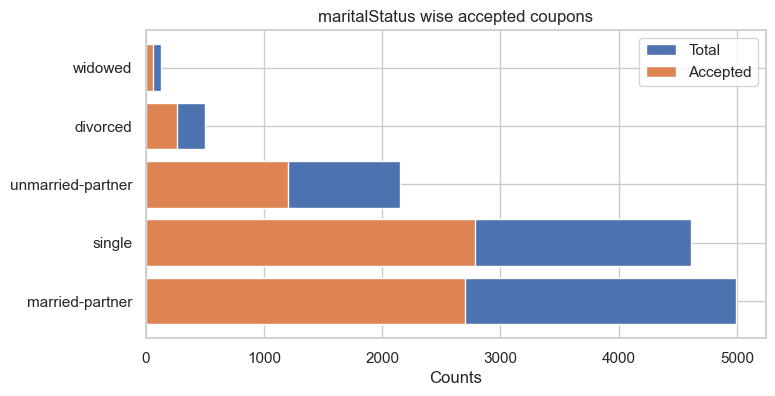

,maritalStatus,Total_Count,Accepted,Rejected,%Accepted,%Rejected
1,married-partner,4994,2697,2297,54.005,45.995
2,single,4610,2784,1826,60.390,39.610
3,unmarried-partner,2155,1203,952,55.824,44.176
0,divorced,505,266,239,52.673,47.327
4,widowed,129,62,67,48.062,51.938


In [37]:
univariate_analysis('maritalStatus') 

#### Observations:

- Most users in this data are Single or have Married partner. 

- Single users accept more coupons than others.

### CarryAway

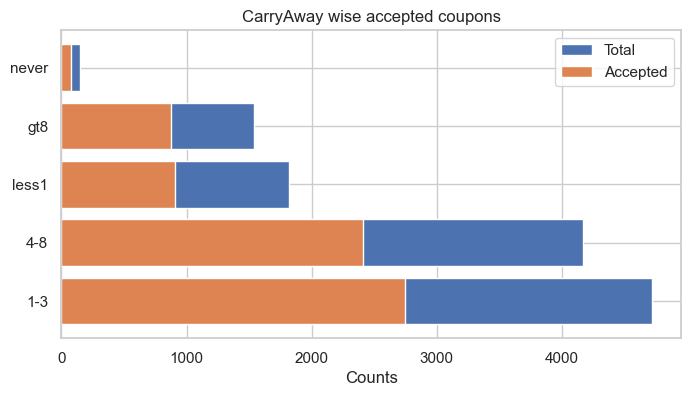

,CarryAway,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,1-3,4719,2743,1976,58.127,41.873
1,4-8,4171,2409,1762,57.756,42.244
3,less1,1819,906,913,49.808,50.192
2,gt8,1535,876,659,57.068,42.932
4,never,149,78,71,52.349,47.651


In [38]:
univariate_analysis('CarryAway')

#### Observations:
- Most users in this data have visited 1 to 8 times Carry Away services. 
- Users who visited Carry Away services greater than 1 time have the highest coupon acceptance ratio .

# Train Test Split

In [39]:
X = df.drop(['Y'], axis=1)
y = df['Y'].values
print(X.shape)
print(y.shape)

(12393, 21)
(12393,)


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9914, 21) (9914,)
(2479, 21) (2479,)


In [41]:
X_train

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same
10421,work,alone,rainy,55,carry-out-take-away,2h,female,26,unmarried-partner,0,...,community-social-services,37500-49999,less1,never,1-3,less1,never,1,0,1
104,work,alone,sunny,55,coffee-house,2h,male,21,single,0,...,student,12500-24999,1-3,less1,1-3,less1,1-3,1,1,0
10279,no-urgent-place,alone,rainy,55,coffee-house,1d,female,50plus,single,1,...,legal,25000-37499,never,less1,4-8,1-3,less1,1,0,0
16,work,alone,sunny,55,coffee-house,2h,female,21,unmarried-partner,1,...,unemployed,37500-49999,never,never,1-3,4-8,1-3,1,1,0
6523,home,alone,sunny,55,restaurant-20-50,2h,male,below21,single,0,...,student,less-than-12500,1-3,4-8,1-3,gt8,4-8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5762,work,alone,sunny,55,coffee-house,1d,male,26,married-partner,1,...,computer-mathematical,50000-62499,never,1-3,1-3,less1,1-3,1,0,0
8130,no-urgent-place,friend-s,sunny,55,carry-out-take-away,1d,male,31,single,0,...,office-administrative-support,12500-24999,4-8,never,gt8,1-3,never,1,0,0
357,home,alone,sunny,55,restaurant-20-50,1d,male,31,married-partner,1,...,computer-mathematical,100000-or-more,less1,1-3,4-8,4-8,4-8,1,0,0
11407,work,alone,snowy,30,coffee-house,1d,male,50plus,married-partner,0,...,retired,50000-62499,less1,less1,less1,less1,less1,0,0,1


# we will use column transformer to encode the values

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Define the categorical, numerical, and ordinal columns
categorical_cols = ['destination', 'passanger', 'weather', 'coupon', 'gender', 'maritalStatus',
                    'occupation', 'Bar', 'CoffeeHouse', 'CarryAway',
                    'RestaurantLessThan20', 'Restaurant20To50', 'has_children', 'temperature']
ordinal_cols = ['education','age', 'income']

# Define the categories for ordinal features
education_categories = ['some-high-school','high-school-graduate','some-college-no-degree',
                        'associates-degree','bachelors-degree','graduate-degree-masters-or-doctorate']
age_categories = ['below21','21','26','31','36','41','46','50plus']
income_categories = ['less-than-12500','12500-24999','25000-37499','37500-49999',
                     '50000-62499','62500-74999','75000-87499','87500-99999','100000-or-more']

# Create the transformers
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ordinal_transformer = OrdinalEncoder(categories=[education_categories, age_categories, income_categories])

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('ord', ordinal_transformer, ordinal_cols),
        # Include binary columns directly without transformation
        ('binary', 'passthrough', ['toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same'])
    ])


In [45]:
X_train = preprocessor.fit_transform(X_train)

In [46]:
X_train.shape

(9914, 69)

In [47]:
X_test = preprocessor.transform(X_test)

In [48]:
X_test.shape

(2479, 69)

In [49]:
X_test

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Modelling

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# Define parameter grids
rf_param_grid = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 5, 10],
                 'min_samples_split': [2, 5, 10]}

gb_param_grid = {'n_estimators': [100, 200, 300],
                 'learning_rate': [0.01, 0.1, 0.2],
                 'max_depth': [3, 5, 7]}

svm_param_grid = {'C': [0.1, 1, 10],
                  'gamma': [0.1, 0.01, 0.001],
                  'kernel': ['linear', 'rbf']}

knearest_param_grid = {'n_neighbors': [3, 5, 7],
                       'weights': ['uniform', 'distance'],
                       'metric': ['euclidean', 'manhattan']}

xgb_param_grid = {'n_estimators': [100, 200, 300],
                  'learning_rate': [0.01, 0.1, 0.2],
                  'max_depth': [3, 5, 7]}


lr_param_grid = {'C': [0.1, 1, 10],
                 'penalty': ['l1', 'l2']}

# Instantiate search objects
rf_grid_search = GridSearchCV(RandomForestClassifier(), param_grid=rf_param_grid, scoring='accuracy', cv=5)
gb_grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid=gb_param_grid, scoring='accuracy', cv=5)
svm_grid_search = GridSearchCV(SVC(), param_grid=svm_param_grid, scoring='accuracy', cv=5)
knearest_grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=knearest_param_grid, scoring='accuracy', cv=5)
xgb_grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid=xgb_param_grid, scoring='accuracy', cv=5)
lr_grid_search = GridSearchCV(LogisticRegression(), param_grid=lr_param_grid, scoring='accuracy', cv=5)  # Logistic regression

# Fit the search objects
rf_grid_search.fit(X_train, y_train)
gb_grid_search.fit(X_train, y_train)
svm_grid_search.fit(X_train, y_train)
knearest_grid_search.fit(X_train, y_train)
xgb_grid_search.fit(X_train, y_train)
lr_grid_search.fit(X_train, y_train)  

# Best parameters and best scores
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print("Random Forest Best Score:", rf_grid_search.best_score_)

print("Gradient Boosting Best Parameters:", gb_grid_search.best_params_)
print("Gradient Boosting Best Score:", gb_grid_search.best_score_)

print("SVM Best Parameters:", svm_grid_search.best_params_)
print("SVM Best Score:", svm_grid_search.best_score_)

print("KNearest Best Parameters:", knearest_grid_search.best_params_)
print("KNearest Best Score:", knearest_grid_search.best_score_)

print("XGBoost Best Parameters:", xgb_grid_search.best_params_)
print("XGBoost Best Score:", xgb_grid_search.best_score_)

print("Logistic Regression Best Parameters:", lr_grid_search.best_params_)
print("Logistic Regression Best Score:", lr_grid_search.best_score_)  

Random Forest Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
Random Forest Best Score: 0.7307844223833971
Gradient Boosting Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Gradient Boosting Best Score: 0.7315920948648783
SVM Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVM Best Score: 0.713939779752518
KNearest Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
KNearest Best Score: 0.6575543990722351
XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
XGBoost Best Score: 0.7349206906536031
Logistic Regression Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Logistic Regression Best Score: 0.6750056102501942


### we can see that the best model after cross validation is Xg-boost

In [53]:
# Get the best hyperparameters for XGBoost
xgb_best_params = xgb_grid_search.best_params_
xgb_best = xgb.XGBClassifier(**xgb_best_params)


In [54]:
xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test data
y_pred = xgb_best.predict(X_test)

# Calculate testing accuracy
testing_accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Testing Accuracy: {testing_accuracy}")

# Print classification report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))

XGBoost Testing Accuracy: 0.7325534489713594
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.64      0.67      1076
           1       0.74      0.81      0.77      1403

    accuracy                           0.73      2479
   macro avg       0.73      0.72      0.72      2479
weighted avg       0.73      0.73      0.73      2479



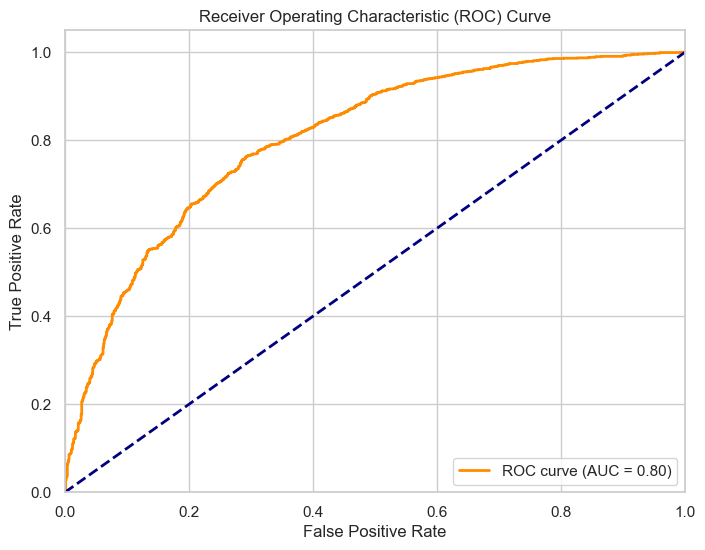

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_prob = xgb_best.predict_proba(X_test)

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### our model is 80% able to differentiate between positive and negative classes